In [ ]:

# Importing models - DO NOT CHANGE
import sys
import numpy as np
from cvxopt import solvers
import cvxopt.solvers                  # cvxopt for solving the dual optimization problem
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#df = pd.read_csv('./pulsar_star_dataset.csv')
#https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('/content/sample_data/pulsar_star_dataset.csv')
df.head()                                                           # reading the dataset

X = df.drop('Class', axis=1)
y = df['Class']                                                                                     # splitting the dataset into features and labels
X = X.to_numpy()
y = y.to_numpy()                                                                                    # converting the dataset into numpy array for ease of use
y[y == 0] = -1                                                                                      # converting the labels to -1 and 1, as per the SVM problem formulation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)           # splitting the dataset into train and test set
mean_train = X_train.mean()                                                                         # standardizing the dataset
std_train = X_train.std()

#########################################    code to be filled part a(i)
X_train = (X_train - mean_train) / std_train                                                        # Fill up this '----------' section
X_test = (X_test - mean_train) / std_train                                                          # Fill up this '----------' section
#########################################    End

class SVM(object):

    def linear_kernel(self, x1, x2):                                                            # defining the kernel functions, using numpy vectorisation to speed up the process
        #########################################    code to be filled a(ii)
        return np.dot(x1, x2)                                                                   # Fill up this '-----------' section
        ###############################              End

    def __init__(self, kernel_str='linear', C=1.0, gamma=0.1):                                 # initializing the SVM class
        if kernel_str == 'linear':
            self.kernel = SVM.linear_kernel
        else:
            self.kernel = SVM.linear_kernel
            print('Invalid kernel string, defaulting to linear.')
        self.C = C
        self.gamma = gamma
        self.kernel_str = kernel_str
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        kernel_matrix = np.zeros((num_samples, num_samples))                                                    # creating the kernel matrix
        kernel_matrix = self.kernel(self, X, X.T)

        P = cvxopt.matrix(np.outer(y,y) * kernel_matrix)                                                    # creating the matrices for the dual optimization problem, derivation explained in report
        q = cvxopt.matrix(np.ones(num_samples) * -1)
        A = cvxopt.matrix(y, (1,num_samples)) * 1.
        b = cvxopt.matrix(0) * 1.
        G_upper = np.diag(np.ones(num_samples) * -1)
        G_lower = np.identity(num_samples)
        G = cvxopt.matrix(np.vstack((G_upper, G_lower)))
        h_upper = np.zeros(num_samples)
        h_lower = np.ones(num_samples) * self.C
        h = cvxopt.matrix(np.hstack((h_upper, h_lower)))

        solvers.options['show_progress'] = False                                                            # turning off the progress bar of cvxopt
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)                                                      # running the qp solver of cvxopt to solve the dual optimization problem
        a = np.ravel(solution['x'])                                                                         # get the lagrange multipliers from the solution
        support_vectors = a > 1e-4                                                                          # get the support vectors which have non-zero lagrange multipliers
        ind = np.arange(len(a))[support_vectors]                                                            # get the indices of the support vectors for the kernel matrix
        self.a = a[support_vectors]                                                                         # storing the data of the solution in the svm object
        self.support_vectors = X[support_vectors]
        self.y_support_vectors = y[support_vectors]
        #print("%d support vectors out of %d points" % (len(self.a), num_samples))

        self.b = 0                                                                                          # deriving the bias value by enforcing the constraint for b in the svm optimization problem
        for n in range(len(self.a)):
            self.b += self.y_support_vectors[n]
            self.b -= np.sum(self.a * self.y_support_vectors * kernel_matrix[ind[n],support_vectors])
        self.b /= len(self.a)

        if self.kernel_str == 'linear':                                                                     # deriving the weights for the linear kernel
            self.w = np.zeros(num_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.y_support_vectors[n] * self.support_vectors[n]
        else:
            self.w = None                                                                                   # if the kernel is not linear, then the weights are not defined

    def predict(self, X):
        if self.kernel_str == 'linear':                                                                     # if linear, then the prediction is given by the linear combination of the support vectors
            #########################################    code to be filled a(iii)
            y_predict = np.dot(X, self.w) + self.b                                                          # Fill up this '----------' section
            return np.sign(y_predict)                                                      # Fill up this '----------' section
            ##############################              End
        else:
            y_predict = np.sum(self.a * self.y_support_vectors * self.kernel(self, X, self.support_vectors.T), axis=1)  # if not linear, then the prediction is given by the kernel modification to the standard linear version
            #########################################    code to be filled a(iv)
            y_predict += self.b                                                                             # Fill up this '----------' section
            return np.sign(y_predict)                                                                       # Fill up this '----------' section
            ##############################              End

# note that running on the full dataset is very slow (3-4 hours), so uncomment the code below and run this cell if you wish to check the results more quickly or apply grid search, comment it out again before running the full dataset
X_train = X_train[:800]
y_train = y_train[:800]
X_test = X_test[:200]
y_test = y_test[:200]

if __name__ == '__main__':

    """
    ALERT: * * * No changes are allowed in this section  * * *
    """

    input_data_one = sys.argv[1].strip()

    """  Call to function that will perform the computation. """
    c_value = float(input_data_one)

    svm_linear = SVM('linear', C=c_value)
    svm_linear.fit(X_train, y_train)
    y_pred_linear = svm_linear.predict(X_test)
    print(accuracy_score(y_test, y_pred_linear))

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/pulsar_star_dataset.csv'

# New Section

https://github.com/Sabyasachi123276/ML-using-Python/blob/main/SVM(different_kernels)_KNN_NaiveBayes_SupervisedLearning(Part_1).ipynb https://github.com/Sabyasachi123276/ML-using-Python/blob/main/Codes%20and%20other%20relevant%20explanations%20for%20supervised%20learning%20(Part%201)_Session%20by%20Sabyasachi%20Mukhopadhyay_August%203.pdf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

by Trina Karmakar <br>
<!-- Email id: skbera.iitkgp21@gmail.com <br>
LinkedIn: [skbera4](https://www.linkedin.com/in/skbera4/) -->

1. Hands on Python: Notebook(Colab, Jupyter) 1st November, 2025

1.   List item

1.   List item
2.   List item


2.   List item


2. Numpy, pandas: 8th November, 2025

In [ ]:

!python --version

Python 3.12.12


### NumPy

In [ ]:

from IPython.display import Image

# Display an image from a file
Image(url='https://i0.wp.com/indianaiproduction.com/wp-content/uploads/2019/06/NumPy-shape.png?resize=1200%2C488&ssl=1',  width=400, height=200)

In [ ]:
from IPython.display import Image

# Display an image from a file
Image(url='https://www.pythontutorial.net/wp-content/uploads/2022/08/what-is-numpy.png', width=400, height=200)

In [ ]:
from IPython.display import Image

# Display an image from a file
Image(url='https://www.pythontutorial.net/wp-content/uploads/2022/08/what-is-numpy.png', width=400, height=200)

In [ ]:
import numpy as np

In [ ]:
# List = ["banaan", "orange", '''']
#List = [1, 2, 3, 4]
array_1d = np.array([1, 2, 3, 4, 5])  # () [] {} [1, 2, 3, 4, 5]
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 19]]) #Matrix
print(f"1D Array:{array_1d}")
print(f"2D Array:\n{array_2d}")

1D Array:[1 2 3 4 5]
2D Array:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 19]]


In [ ]:
print(f"Shape: {array_2d.shape}") # (3,3) #(rows, columns)
print(f"Data Type: {array_2d.dtype}")
print(f"Number of Dimensions: {array_2d.ndim}")

Shape: (3, 3)
Data Type: int64
Number of Dimensions: 2


In [ ]:
#3-D array

import numpy as np

arr = np.array([[[1, 2, 3,5], [4, 5, 6,4]], [[1, 2, 3,2], [4, 5, 6,3]]], dtype = 'int32')

print(arr)

[[[1 2 3 5]
  [4 5 6 4]]

 [[1 2 3 2]
  [4 5 6 3]]]


In [ ]:
arr.dtype

dtype('int32')

In [ ]:
print(f"First row of 2D array: {array_2d[0, :]}" ) #[row, column] #[start:end:skip, start:end:skip]
print(f"First column of 2D array: {array_2d[:, 0]}" )
print(f"2D array: {array_2d}" )


First row of 2D array: [1 2 3]
First column of 2D array: [1 4 7]
2D array: [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 19]]


## arange() function

In [ ]:
#arange function

a = np.arange(0,10,1)

b = np.arange(0,10,2) #(start, end, skip)

c = np.arange(-10,10, 0.5)

c

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

# Fill the blank to generate the following  vector
$$\begin{bmatrix} -30 & -20 & -10 & 0 & 10 & 20 & 30 & 40 \end{bmatrix}$$

In [ ]:
p = np.arange(-30, 50, 10) #fill the blank
p

array([-30, -20, -10,   0,  10,  20,  30,  40])

In [ ]:
import numpy as np

float_array = np.arange(1,9, dtype='int64').reshape(2, 2, -1)

float_array

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

# Fill the blanks to generate the following matrix
$$\begin{bmatrix} 1.5 & 2.5 & 3.5 \\ 4.5 & 5.5 & 6.5  \\ 7.5 & 8.5 & 9.5  \end{bmatrix}$$

In [ ]:
float_array = np.arange(1.5, 10.5, 1,  dtype='float64').reshape(3,3)

print(float_array)

[[1.5 2.5 3.5]
 [4.5 5.5 6.5]
 [7.5 8.5 9.5]]


In [ ]:
#array full of zeros and ones

zero_array = np.zeros((2,3), dtype='int64')

one_array = np.ones((2,3), dtype='float64')

full_array = np.full((2,2), 99, dtype='int64')

full_array

array([[99, 99],
       [99, 99]])

In [ ]:
import numpy as np


a = np.arange(20,30).reshape(2, 5)
# print(a)

b = np.arange(25, 45).reshape(5, 4)

c = np.matmul(a,b)

# print(np.linalg.det(c)).
c

array([[3670, 3780, 3890, 4000],
       [4495, 4630, 4765, 4900]])

In [ ]:
print(np.linalg.eig(c))

print(np.linalg.norm(c))

print(np.linalg.matrix_rank(c))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:
a = np.array([[1,1], [1,1]])
b = np.array([[1,1], [1,1]])

print(np.linalg.solve(a,b))  #ax=b => x=b*a^-1

print(np.matmul(np.linalg.inv(a), b))
# print(a)
# print(b)

LinAlgError: Singular matrix

# Mathematics

In [ ]:
a = np.array([1,2,3,4], dtype='int64')

print(a+2)
print(a*2)
print(a**2)
print(a/2)

[3 4 5 6]
[2 4 6 8]
[ 1  4  9 16]
[0.5 1.  1.5 2. ]


In [ ]:
angles = np.arange(30,360,30)*np.pi/180 #angles in radians..

sin_values = np.sin(angles)
sin_values

array([ 5.00000000e-01,  8.66025404e-01,  1.00000000e+00,  8.66025404e-01,
        5.00000000e-01,  1.22464680e-16, -5.00000000e-01, -8.66025404e-01,
       -1.00000000e+00, -8.66025404e-01, -5.00000000e-01])

In [ ]:
import numpy as np

# Two 1D vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Dot product
result = np.dot(a, b)
print(f"Dot product: {result}")


Dot product: 32


In [ ]:
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# Matrix multiplication using @
C = A @ B.T
print("Matrix multiplication:\n", C)


Matrix multiplication:
 [[17 23]
 [39 53]]


In [ ]:
x = np.array([0, np.pi/2, np.pi])
y = np.sin(x)
print("sin(x):", np.round(y))


sin(x): [0. 1. 0.]


In [ ]:
angles = np.arange(30,360,30)*np.pi/180 #angles in radians..

sin_values = np.sin(angles)
np.round(sin_values, 2)


array([ 0.5 ,  0.87,  1.  ,  0.87,  0.5 ,  0.  , -0.5 , -0.87, -1.  ,
       -0.87, -0.5 ])

In [ ]:
import numpy as np

# Define coefficients for p(x) = x^2 + 2x + 1
coeffs = [1, -2, 3, -4]

# Evaluate polynomial at different x values
x = int(input('Enter a number'))
y = np.polyval(coeffs, x)

print("x:", x)
print("p(x) = x^3 - 2x^2 + 3x - 4 →", y)


Enter a number100
x: 100
p(x) = x^3 - 2x^2 + 3x - 4 → 980296


In [ ]:
import numpy as np

x = np.array([0, 0.001, 1, 9, 99])

normal_log = np.log(1 + x)
safe_log = np.log1p(x)

print("Using np.log(1+x):", np.round(normal_log, 4))
print("Using np.log1p(x):", np.round(safe_log, 4))


Using np.log(1+x): [0.0000e+00 1.0000e-03 6.9310e-01 2.3026e+00 4.6052e+00]
Using np.log1p(x): [0.0000e+00 1.0000e-03 6.9310e-01 2.3026e+00 4.6052e+00]


### Pandas

In [ ]:
from IPython.display import Image

# Display an image from a file
Image(url='https://miro.medium.com/v2/resize:fit:1400/0*11IwZmSKXw77eYz5', width=400, height=200)


:Link to UCI ML Repo: https://archive.ics.uci.edu/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, names=column_names)
print(iris_df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
sepal_length = np.array(iris_df['sepal_length'])
sepal_width = np.array(iris_df['sepal_width'])


In [ ]:
mean_sepal_length = np.mean(sepal_length)
std_sepal_width = np.std(sepal_width)
#mode_sepal_width = np.median(sepal_width)
#print ("Median Sepal Widt_h: ", mode_sepal_width)
print("Mean Sepal Length:", meansepal_length)
print("Standard Deviation of Sepal Width:", std_sepal_width)


Median Sepal Width:  3.0
Mean Sepal Length: 5.843333333333334
Standard Deviation of Sepal Width: 0.4321465800705435


In [ ]:
large_sepals = sepal_length > mean_sepal_length
print(type(mean_sepal_length), type(large_sepals))
print(large_sepals)
print("Flowers with large sepals:", sepal_length[large_sepals])


<class 'numpy.float64'> <class 'numpy.ndarray'>
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False  True False  True False  True False
 False  True  True  True False  True False False  True False  True  True
  True  True  True  True  True  True  True False False False False  True
 False  True  True  True False False False  True False False False False
 False  True False False  True False  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True]
Flowers with large sepals: [7.  6.4 6.

In [ ]:
iris_df[iris_df['sepal_length'] > mean_sepal_length]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(iris_df.head())
print(iris_df.describe())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
iris_df[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,0,17.85
1,4.9,3.0,1.4,0.2,0,14.70
2,4.7,3.2,1.3,0.2,0,15.04
3,4.6,3.1,1.5,0.2,0,14.26
4,5.0,3.6,1.4,0.2,0,18.00
5,5.4,3.9,1.7,0.4,0,21.06
6,4.6,3.4,1.4,0.3,0,15.64
7,5.0,3.4,1.5,0.2,0,17.00
8,4.4,2.9,1.4,0.2,0,12.76
9,4.9,3.1,1.5,0.1,0,15.19


In [ ]:
print(iris_df.info())
print(iris_df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
iris_s = iris_df[iris_df['species'] == 'Iris-setosa']
iris_s.shape #(50 samples, 5 columns)

(50, 5)

In [ ]:

versicolor = iris_df[iris_df['species'] == 'Iris-versicolor']
print("Versicolor Type:\n", type(versicolor))
print("Versicolor Flowers:\n", versicolor)


Versicolor Type:
 <class 'pandas.core.frame.DataFrame'>
Versicolor Flowers:
     sepal_length  sepal_width  petal_length  petal_width          species
50           7.0          3.2           4.7          1.4  Iris-versicolor
51           6.4          3.2           4.5          1.5  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
53           5.5          2.3           4.0          1.3  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor
55           5.7          2.8           4.5          1.3  Iris-versicolor
56           6.3          3.3           4.7          1.6  Iris-versicolor
57           4.9          2.4           3.3          1.0  Iris-versicolor
58           6.6          2.9           4.6          1.3  Iris-versicolor
59           5.2          2.7           3.9          1.4  Iris-versicolor
60           5.0          2.0           3.5          1.0  Iris-versicolor
61           5.9          3.0      

In [ ]:
'Iris-setosa'

'Iris-setosa'

In [ ]:
iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']
#print("With Sepal Area:\n", iris_df.head())
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10
146,6.3,2.5,5.0,1.9,Iris-virginica,15.75
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08


### Seaborn


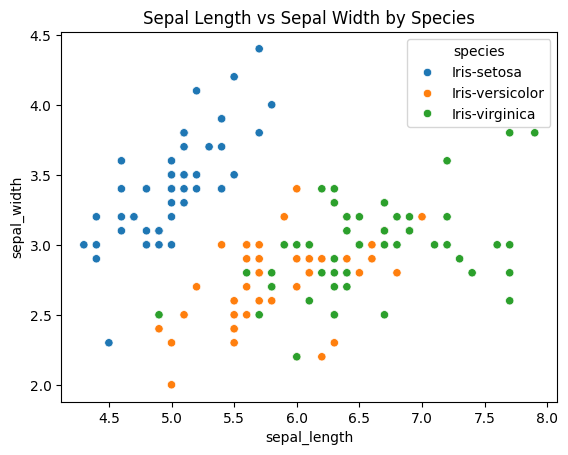

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()


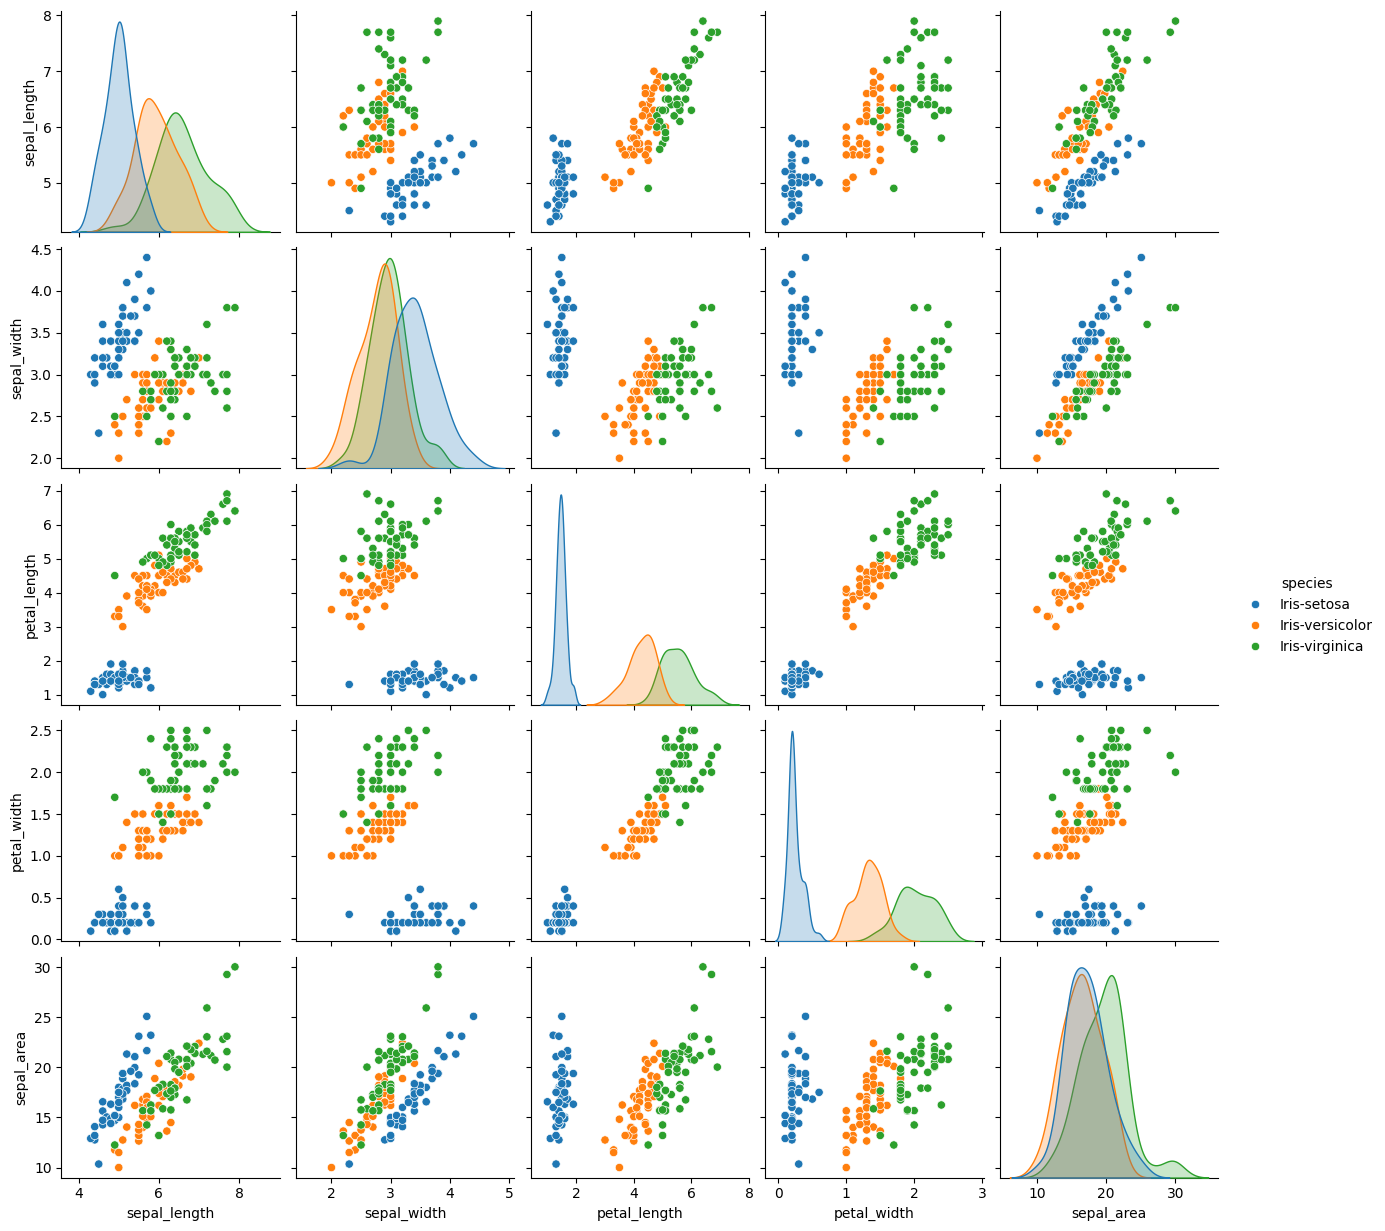

In [ ]:
sns.pairplot(iris_df, diag_kind = 'kde', hue='species')
plt.show()


In [ ]:
correlation_matrix = iris_df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width   species  \
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561   
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446   
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043   
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464   
species           0.782561    -0.419446      0.949043     0.956464  1.000000   
sepal_area        0.683362     0.645421      0.366584     0.375365  0.301045   

              sepal_area  
sepal_length    0.683362  
sepal_width     0.645421  
petal_length    0.366584  
petal_width     0.375365  
species         0.301045  
sepal_area      1.000000  


In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.show()


NameError: name 'sns' is not defined

In [ ]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['species'] = iris_df['species'].map(species_mapping)

print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species  sepal_area
0           5.1          3.5           1.4          0.2      NaN       17.85
1           4.9          3.0           1.4          0.2      NaN       14.70
2           4.7          3.2           1.3          0.2      NaN       15.04
3           4.6          3.1           1.5          0.2      NaN       14.26
4           5.0          3.6           1.4          0.2      NaN       18.00
